In [1]:
%matplotlib inline
from matplotlib.pyplot import imshow
from matplotlib import pylab as plt  
import numpy as np
import cv2 as cv
from colorsys import hsv_to_rgb

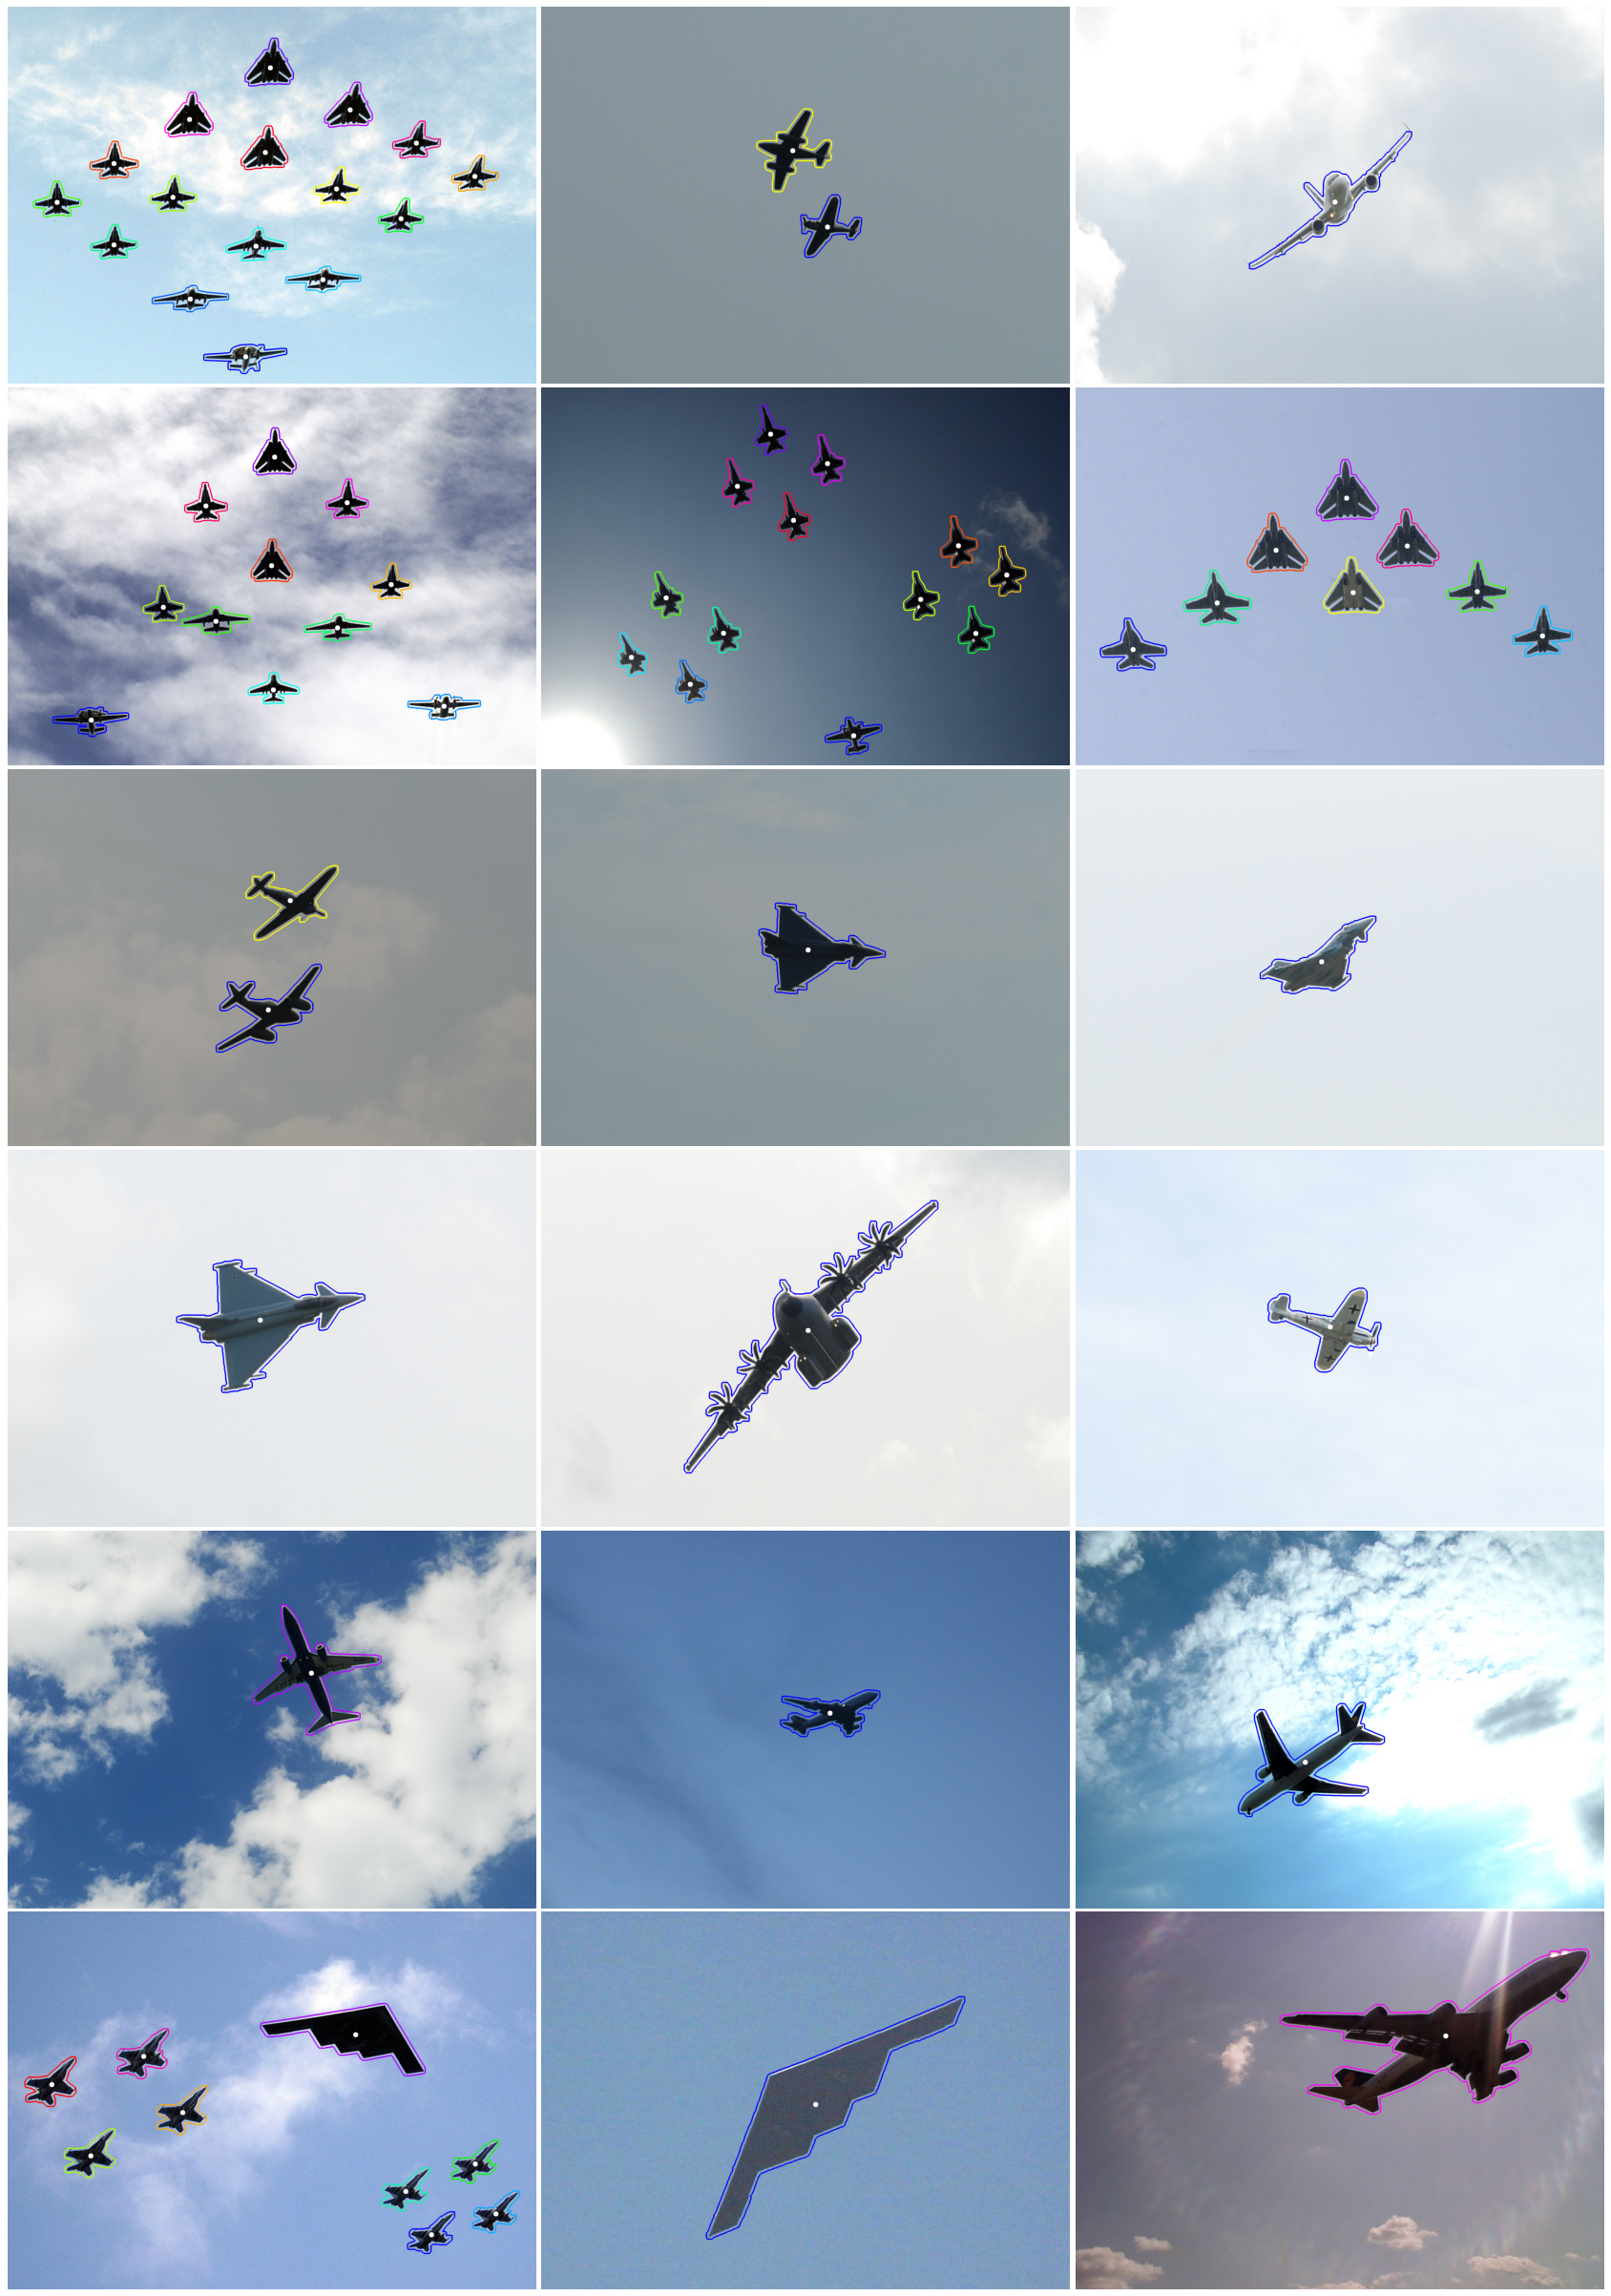

In [2]:
# numbers_2 = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20]
numbers = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
planes = ['img/samolot{:02d}.jpg'.format(i) for i in numbers]

def show_jpg(columns, rows, args):
    fig, ax = plt.subplots(figsize = (30, 44))
    
    temp_img = cv.imread(args[0])
    width = int(temp_img.shape[1])
    height = int(temp_img.shape[0])
    dim = (width, height)
    
    for i in range(columns * rows):
        fig.add_subplot(rows, columns, i + 1)
        plt.axis('off')
        ax.axis('off')
        
        kernel = np.ones((9, 9), np.uint8)
        low_threshold = 20
        ratio = 6
        min_area = 9000

        image = cv.resize(cv.imread(args[i]), dim, interpolation = cv.INTER_AREA)
        image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        image_blur = cv.medianBlur(image_gray, 11)
        image_opening = cv.morphologyEx(image_blur, cv.MORPH_OPEN, kernel)
        image_canny = cv.Canny(image_opening, low_threshold, low_threshold*ratio)
        image_dilation = cv.dilate(image_canny, kernel, iterations=2)

        contours, hierarchy = cv.findContours(image_dilation, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
        
        for j, contour in enumerate(contours):
            area = cv.contourArea(contour)
            
            if area > min_area:
                cv.drawContours(image, [contour], -1, np.array(hsv_to_rgb(1/len(contours) * j, 1, 1)) * 255.0, 4)

                M = cv.moments(contour)

                if M["m00"] != 0:
                    cX = int(M["m10"] / M["m00"])
                    cY = int(M["m01"] / M["m00"])
                    cv.circle(image, (cX, cY), 10, (255, 255, 255), -1)
    
        result = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        plt.imshow(result)
            
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    fig.savefig('04_2.pdf', bbox_inches='tight')
        
    
show_jpg(3, 6, planes)    